<a href="https://colab.research.google.com/github/hemanthpoojar21-maker/coffee-sales-project/blob/main/coffesalesproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings("ignore")


In [ ]:
from google.colab import files
import pandas as pd

uploaded = files.upload()
import io
df = pd.read_csv(io.BytesIO(list(uploaded.values())[0]))
df.head()


Saving coffee_sales_project.csv to coffee_sales_project (1).csv


,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df['date'] = pd.to_datetime(df['date'])
df['datetime'] = pd.to_datetime(df['datetime'])

df['card'].fillna('cash_user', inplace=True)

df['month'] = df['date'].dt.strftime('%Y-%m')
df['day'] = df['date'].dt.day_name()
df['hour'] = df['datetime'].dt.hour

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1133 non-null   datetime64[ns]
 1   datetime     1133 non-null   datetime64[ns]
 2   cash_type    1133 non-null   object        
 3   card         1133 non-null   object        
 4   money        1133 non-null   float64       
 5   coffee_name  1133 non-null   object        
 6   month        1133 non-null   object        
 7   day          1133 non-null   object        
 8   hour         1133 non-null   int32         
dtypes: datetime64[ns](2), float64(1), int32(1), object(5)
memory usage: 75.4+ KB


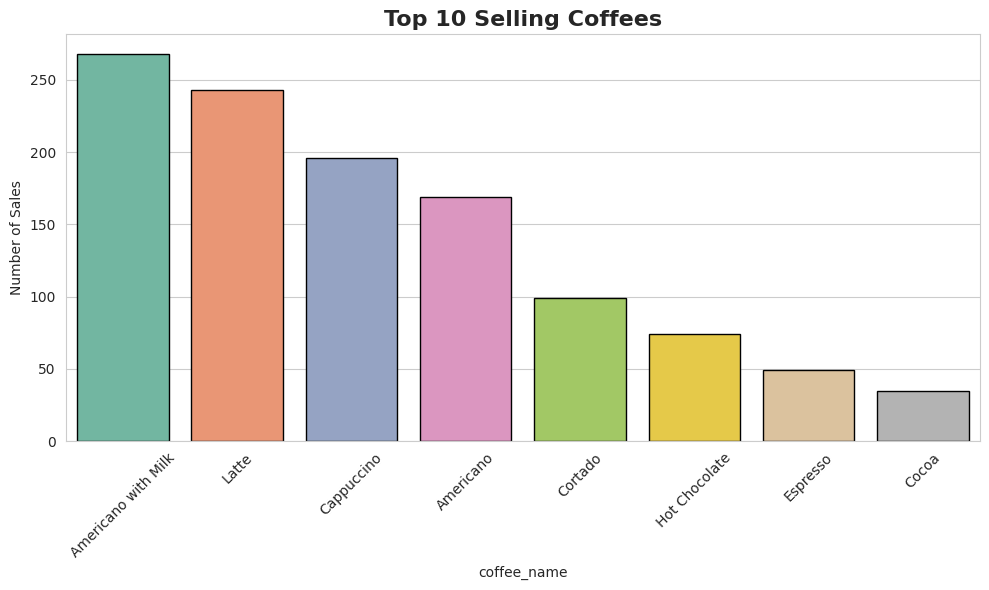

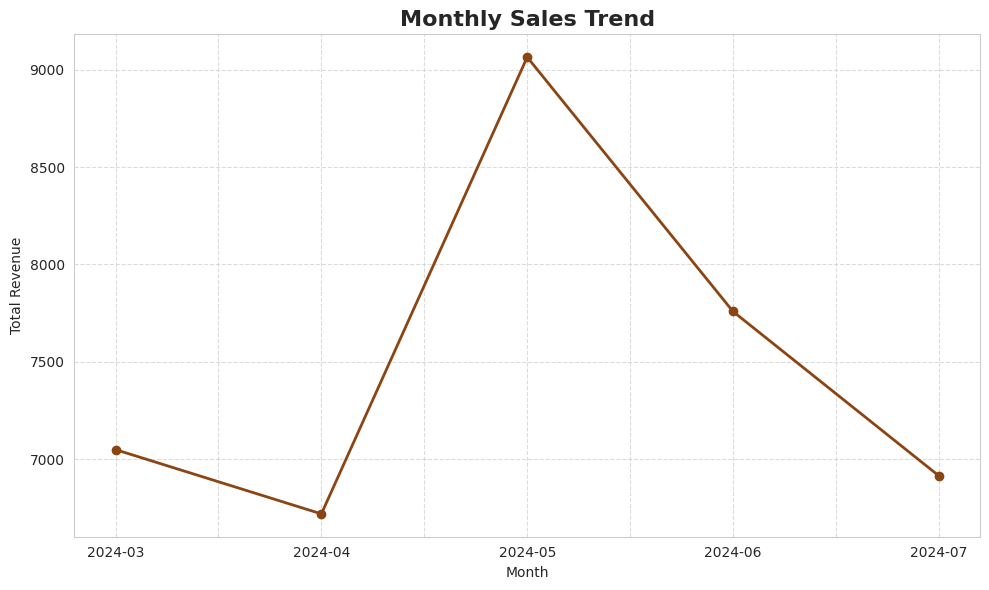

In [ ]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10,6)

# Top-selling coffees
top_coffees = df['coffee_name'].value_counts().head(10)
sns.barplot(x=top_coffees.index, y=top_coffees.values, palette='Set2', edgecolor='black')
plt.title('Top 10 Selling Coffees', fontsize=16, fontweight='bold')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Monthly sales trend
monthly_sales = df.groupby('month')['money'].sum()
monthly_sales.plot(marker='o', color='saddlebrown', linewidth=2)
plt.title('Monthly Sales Trend', fontsize=16, fontweight='bold')
plt.ylabel('Total Revenue')
plt.xlabel('Month')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


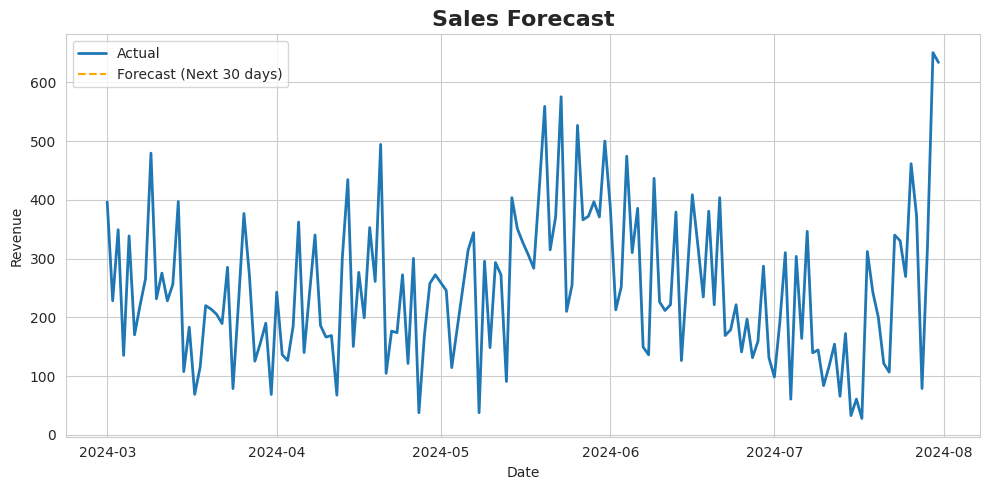

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

#daily sales data
daily_sales = df.groupby('date')['money'].sum().sort_index()

# Fit model
model = ExponentialSmoothing(daily_sales, trend='add', seasonal=None)
fit = model.fit(optimized=True)

#next 30 days
future_dates = pd.date_range(start=daily_sales.index[-1] + pd.Timedelta(days=1), periods=30)
forecast = pd.Series(fit.forecast(30), index=future_dates)

# Plot
plt.figure(figsize=(10,5))
plt.plot(daily_sales.index, daily_sales.values, label='Actual', linewidth=2)
plt.plot(forecast.index, forecast.values, label='Forecast (Next 30 days)', linestyle='--', color='orange')
plt.title('Sales Forecast', fontsize=16, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.tight_layout()
plt.show()


Selected Customer: ANON-0000-0000-0024
Total Purchases: 12
Total Spent: 422.26


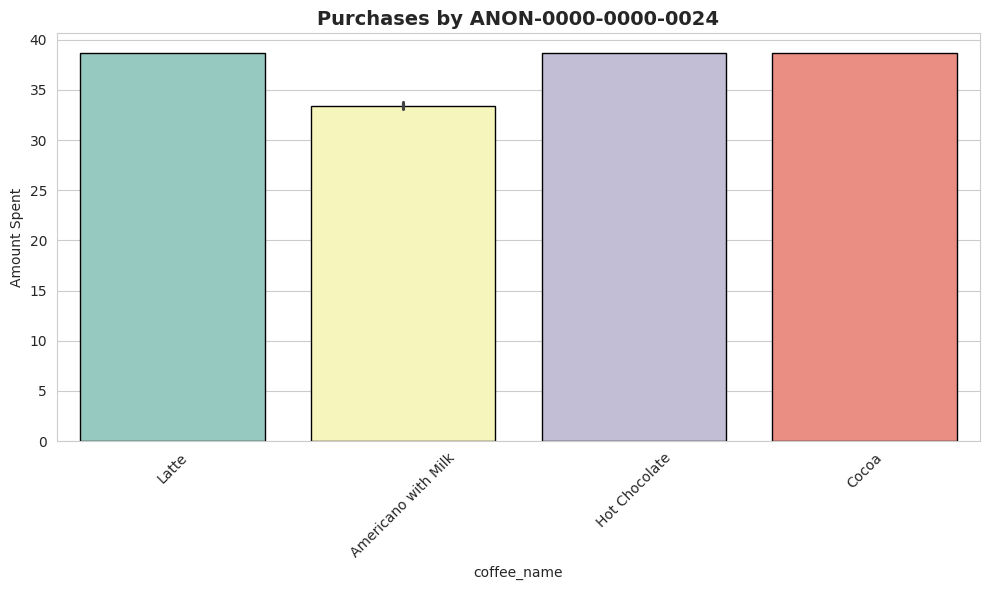

In [ ]:
multi_buyers = df['card'].value_counts()
target_customer = multi_buyers[multi_buyers < 15].index[0]

cust_data = df[df['card'] == target_customer]

print(f"Selected Customer: {target_customer}")
print("Total Purchases:", cust_data.shape[0])
print("Total Spent:", cust_data['money'].sum())

sns.barplot(
    data=cust_data,
    x='coffee_name',
    y='money',
    palette='Set3',
    edgecolor='black'
)
plt.title(f'Purchases by {target_customer}', fontsize=14, fontweight='bold')
plt.ylabel('Amount Spent')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
df.to_csv("cleaned_data.csv", index=False)

forecast.to_csv("sales_forecast.csv")
